In [1]:
import numpy as np
import neuralNetwork as nn
import learningFunctions as lnf
import errorFunctions as errfun
import activationFunctions as actfun
import datasets as ds
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
#Costruzione path del dataset
current_path = os.getcwd()
data_path = os.path.join(current_path, 'Data')
train_file_path = os.path.join(data_path, "mnist_train.csv")
test_file_path = os.path.join(data_path, "mnist_test.csv")

In [3]:
#Lettura csv con pandas
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

In [4]:
#Ottenimento array per il training e il testing
train_array = np.array(train_data)
test_array = np.array(test_data)

In [5]:
#Estrapoliamo il numero di righe e di colonne di train e test
m, n = train_array.shape 
mtest, ntest = test_array.shape  

#Mescola casualmente i dati prima di suddividerli in set di sviluppo e training
np.random.shuffle(train_array)  

In [6]:
#Calcolo percentuale dati per il validation set
val_percentage = 0.20
val_index = int(np.ceil(m * val_percentage))

#Distribuzione training, validation e test set
Xval, Yval = ds.get_mnist_validation(train_array, n, val_index)
Xtrain, Ytrain = ds.get_mnist_training(train_array, n, m, val_index)
Xtest, Ytest = ds.get_mnist_testing(test_array, ntest, mtest)

In [7]:
#Creazione rete neurale
#Assegnazione funzioni di attivazione per ogni strato della rete
hidden_activation_functions = [actfun.tanh, actfun.tanh, actfun.tanh, actfun.tanh, actfun.tanh, actfun.tanh, actfun.tanh, actfun.tanh, actfun.tanh, actfun.tanh]
#Assegnazione numero di neuroni per ogni strato
hidden_layers = [20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
#Assegnazione della funzione di attivazione e di errore per l'ultimo strato della rete
output_activation_function = actfun.identity
error_function = errfun.cross_entropy_softmax
#Estrazione input e target
input_layer_size = Xtrain.shape[0]
output_layer_size = Ytrain.shape[0]
network = nn.NeuralNetwork(hidden_activation_functions, output_activation_function, error_function,
                input_layer_size, hidden_layers, output_layer_size)


In [8]:
#Copia la rete principale in una per il training
training_net=lnf.duplicate_network(network)
lnf.get_net_structure(training_net)

num_hidden_layers:  10
input_size:  784
output_size:  10
neurons in hidden layers:
20
20
20
20
20
20
20
20
20
20
activation functions:
tanh
tanh
tanh
tanh
tanh
tanh
tanh
tanh
tanh
tanh
identity
error_function: cross_entropy_softmax


In [9]:
#batch training
err, errV, accT, accV=lnf.train_neural_network(training_net,Xtrain,Ytrain,Xval,Yval,max_epochs=1000,learning_rate=0.00001)

0/1000, Training Accuracy: 0.09725202608387674, Validation Accuracy: 0.09859154929577464


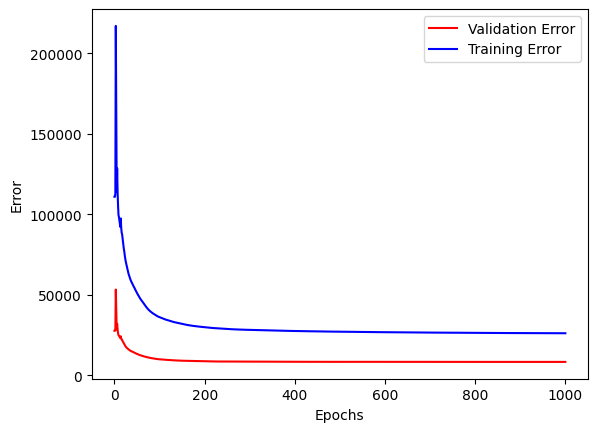

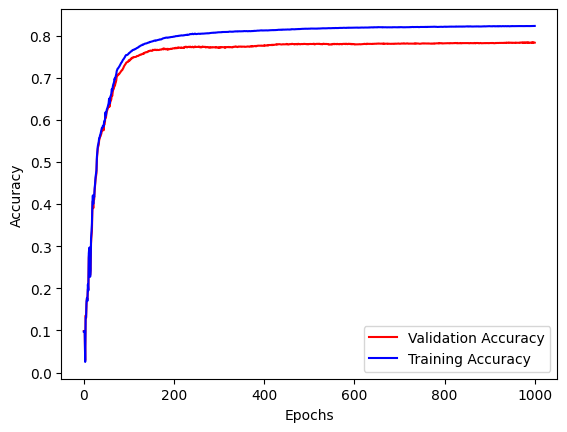

In [10]:
#Stampa grafico dell'errore ottenuto attraverso il training
plt.figure()
plt.plot(errV, 'r', label='Validation Error')
plt.plot(err, 'b', label='Training Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

plt.figure()
plt.plot(accV, 'r', label='Validation Accuracy')
plt.plot(accT, 'b', label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
#Stampa accuracy per training e test set
accuracy_test=lnf.network_accuracy(training_net,Xtest,Ytest)
print('test accuracy: ',accuracy_test)
accuracy_training=lnf.network_accuracy(training_net,Xtrain,Ytrain)
print('train accuracy: ',accuracy_training)

test accuracy:  0.7762776277627763
train accuracy:  0.8226004708431426


y_net: [[0.08122748]
 [0.0976892 ]
 [0.09409576]
 [0.10637334]
 [0.08522744]
 [0.10251871]
 [0.10089633]
 [0.09469145]
 [0.12501001]
 [0.11227027]]
y_net_trained: [[3.22578309e-05]
 [3.31890700e-04]
 [3.79647958e-04]
 [1.01773387e-03]
 [5.27350686e-02]
 [3.57451114e-04]
 [2.19792112e-05]
 [6.94459517e-03]
 [4.88695240e-03]
 [9.33292423e-01]]


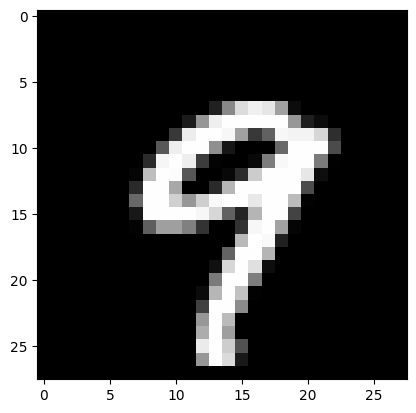

In [12]:
#Predizione rete senza addestramento e rete addestrata
x = 8898
lnf.test_prediction(network, training_net, x, Xtest)